#### DWM: Take BreastCancer.csv file. (1) (a) Find which attributes should be trivially excluded for classification. (b) Divide the data into Training Set (70%) and Test Set (30%) using Stratified Sampling method. (2) Using Bayesian Classifier to train the model using the Training Set. (3) Write the Model and use the model for testing it using Test Set. Determine the accuracy of the Classifier.

In [1]:
# Importing necessary libraries
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For plotting graphs and visualizations
import seaborn as sns  # For enhanced data visualization
from sklearn.decomposition import PCA  # For Principal Component Analysis (PCA)


In [2]:
# Importing dataset
data = pd.read_csv('BreastCancer.csv')  # Read the BreastCancer.csv file into a pandas DataFrame
data  # Display the DataFrame to inspect its contents


,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,benign
1,1002945,5,4,4,5,7,10.0,3,2,1,benign
2,1015425,3,1,1,1,2,2.0,3,1,1,benign
3,1016277,6,8,8,1,3,4.0,3,7,1,benign
4,1017023,4,1,1,3,2,1.0,3,1,1,benign
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,benign
695,841769,2,1,1,1,2,1.0,1,1,1,benign
696,888820,5,10,10,3,7,3.0,8,10,2,malignant
697,897471,4,8,6,4,3,4.0,10,6,1,malignant


In [3]:
data["Class"].value_counts()  # Count the occurrences of each class in the "Class" column


Class
benign       458
malignant    241
Name: count, dtype: int64

In [4]:
data.shape

(699, 11)

In [5]:
data.columns

Index(['Id', 'Cl.thickness', 'Cell.size', 'Cell.shape', 'Marg.adhesion',
       'Epith.c.size', 'Bare.nuclei', 'Bl.cromatin', 'Normal.nucleoli',
       'Mitoses', 'Class'],
      dtype='object')

In [6]:
data.isnull().sum()# Checking for null values

Id                  0
Cl.thickness        0
Cell.size           0
Cell.shape          0
Marg.adhesion       0
Epith.c.size        0
Bare.nuclei        16
Bl.cromatin         0
Normal.nucleoli     0
Mitoses             0
Class               0
dtype: int64

In [7]:
benign_data = data[data['Class'] == 'benign']  # Extract rows where the class is 'benign' and assign them to the variable benign_data


In [8]:
# Check for null values in all columns
benign_data.isnull().sum()  # Count the null values in each column of benign_data DataFrame

Id                  0
Cl.thickness        0
Cell.size           0
Cell.shape          0
Marg.adhesion       0
Epith.c.size        0
Bare.nuclei        14
Bl.cromatin         0
Normal.nucleoli     0
Mitoses             0
Class               0
dtype: int64

In [9]:
# Dropping rows with missing values
# benign_data = benign_data.dropna()  # Optionally drop rows with missing values

# Replace missing values in the 'Bare.nuclei' column with the mean
benign_data['Bare.nuclei'].fillna(benign_data['Bare.nuclei'].mean(), inplace=True)

benign_data  # Display the benign_data DataFrame


C:\Users\DELL\AppData\Local\Temp\ipykernel_10552\979579339.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  benign_data['Bare.nuclei'].fillna(benign_data['Bare.nuclei'].mean(), inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_10552\979579339.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  benign_data['Bare.nuclei'].fillna(benign

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,benign
1,1002945,5,4,4,5,7,10.0,3,2,1,benign
2,1015425,3,1,1,1,2,2.0,3,1,1,benign
3,1016277,6,8,8,1,3,4.0,3,7,1,benign
4,1017023,4,1,1,3,2,1.0,3,1,1,benign
...,...,...,...,...,...,...,...,...,...,...,...
690,654546,1,1,1,3,2,1.0,1,1,1,benign
692,714039,3,1,1,1,2,1.0,1,1,1,benign
693,763235,3,1,1,1,2,1.0,2,1,2,benign
694,776715,3,1,1,1,3,2.0,1,1,1,benign


In [10]:
malignant_data = data[data['Class'] == 'malignant']  # Extract rows where the class is 'malignant' and assign them to the variable malignant_data


In [11]:
# Check for null values in all columns
malignant_data.isnull().sum()  # Count the null values in each column of malignant_data DataFrame

Id                 0
Cl.thickness       0
Cell.size          0
Cell.shape         0
Marg.adhesion      0
Epith.c.size       0
Bare.nuclei        2
Bl.cromatin        0
Normal.nucleoli    0
Mitoses            0
Class              0
dtype: int64

In [12]:
# Dropping rows with missing values
# malignant_data = malignant_data.dropna()  # Optionally drop rows with missing values

# Replace missing values in the 'Bare.nuclei' column with the mean
malignant_data['Bare.nuclei'].fillna(malignant_data['Bare.nuclei'].mean(), inplace=True)

malignant_data  # Display the malignant_data DataFrame


C:\Users\DELL\AppData\Local\Temp\ipykernel_10552\282015363.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  malignant_data['Bare.nuclei'].fillna(malignant_data['Bare.nuclei'].mean(), inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_10552\282015363.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  malignant_data['Bare.nuclei'].fill

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
5,1017122,8,10,10,8,7,10.0,9,7,1,malignant
12,1041801,5,3,3,3,2,3.0,4,4,1,malignant
14,1044572,8,7,5,10,7,9.0,5,5,4,malignant
15,1047630,7,4,6,4,6,1.0,4,3,1,malignant
18,1050670,10,7,7,6,4,10.0,4,1,2,malignant
...,...,...,...,...,...,...,...,...,...,...,...
681,1371026,5,10,10,10,4,10.0,5,6,3,malignant
691,695091,5,10,10,5,4,5.0,4,4,1,malignant
696,888820,5,10,10,3,7,3.0,8,10,2,malignant
697,897471,4,8,6,4,3,4.0,10,6,1,malignant


In [13]:
# Checking the average of class benign and malignant
t = data.groupby('Class')['Bare.nuclei'].mean()
t

Class
benign       1.346847
malignant    7.627615
Name: Bare.nuclei, dtype: float64

In [14]:
data = pd.concat([benign_data, malignant_data], axis=0)  # Concatenate the benign_data and malignant_data DataFrames along the rows (axis=0)


In [15]:
# Checking for null values again to confirm they have been removed
data.isnull().sum()

Id                 0
Cl.thickness       0
Cell.size          0
Cell.shape         0
Marg.adhesion      0
Epith.c.size       0
Bare.nuclei        0
Bl.cromatin        0
Normal.nucleoli    0
Mitoses            0
Class              0
dtype: int64

In [16]:
# Calculating the ration of benign is to malignant
ratio = (data['Class'] == 'benign').sum() / (data['Class'] == 'malignant').sum()
ratio # Ratio = 458 / 241

1.900414937759336

In [17]:
# There is no need to encode the diagnosis column ('Class') as it is the dependent variable (y).
# However, we encode the diagnosis column to find correlation and create a heatmap.

from sklearn.preprocessing import LabelEncoder  # Importing LabelEncoder from scikit-learn
le = LabelEncoder()  # Instantiating a LabelEncoder object

# Encode the 'Class' column to numerical values
data['Class_enc'] = le.fit_transform(data['Class'])


In [18]:
# Deleting the diagnosis column ('Class') as we encoded it in 'Class_enc'

data = data.drop('Class', axis=1)  # Drop the 'Class' column along the columns axis (axis=1)


<Axes: >

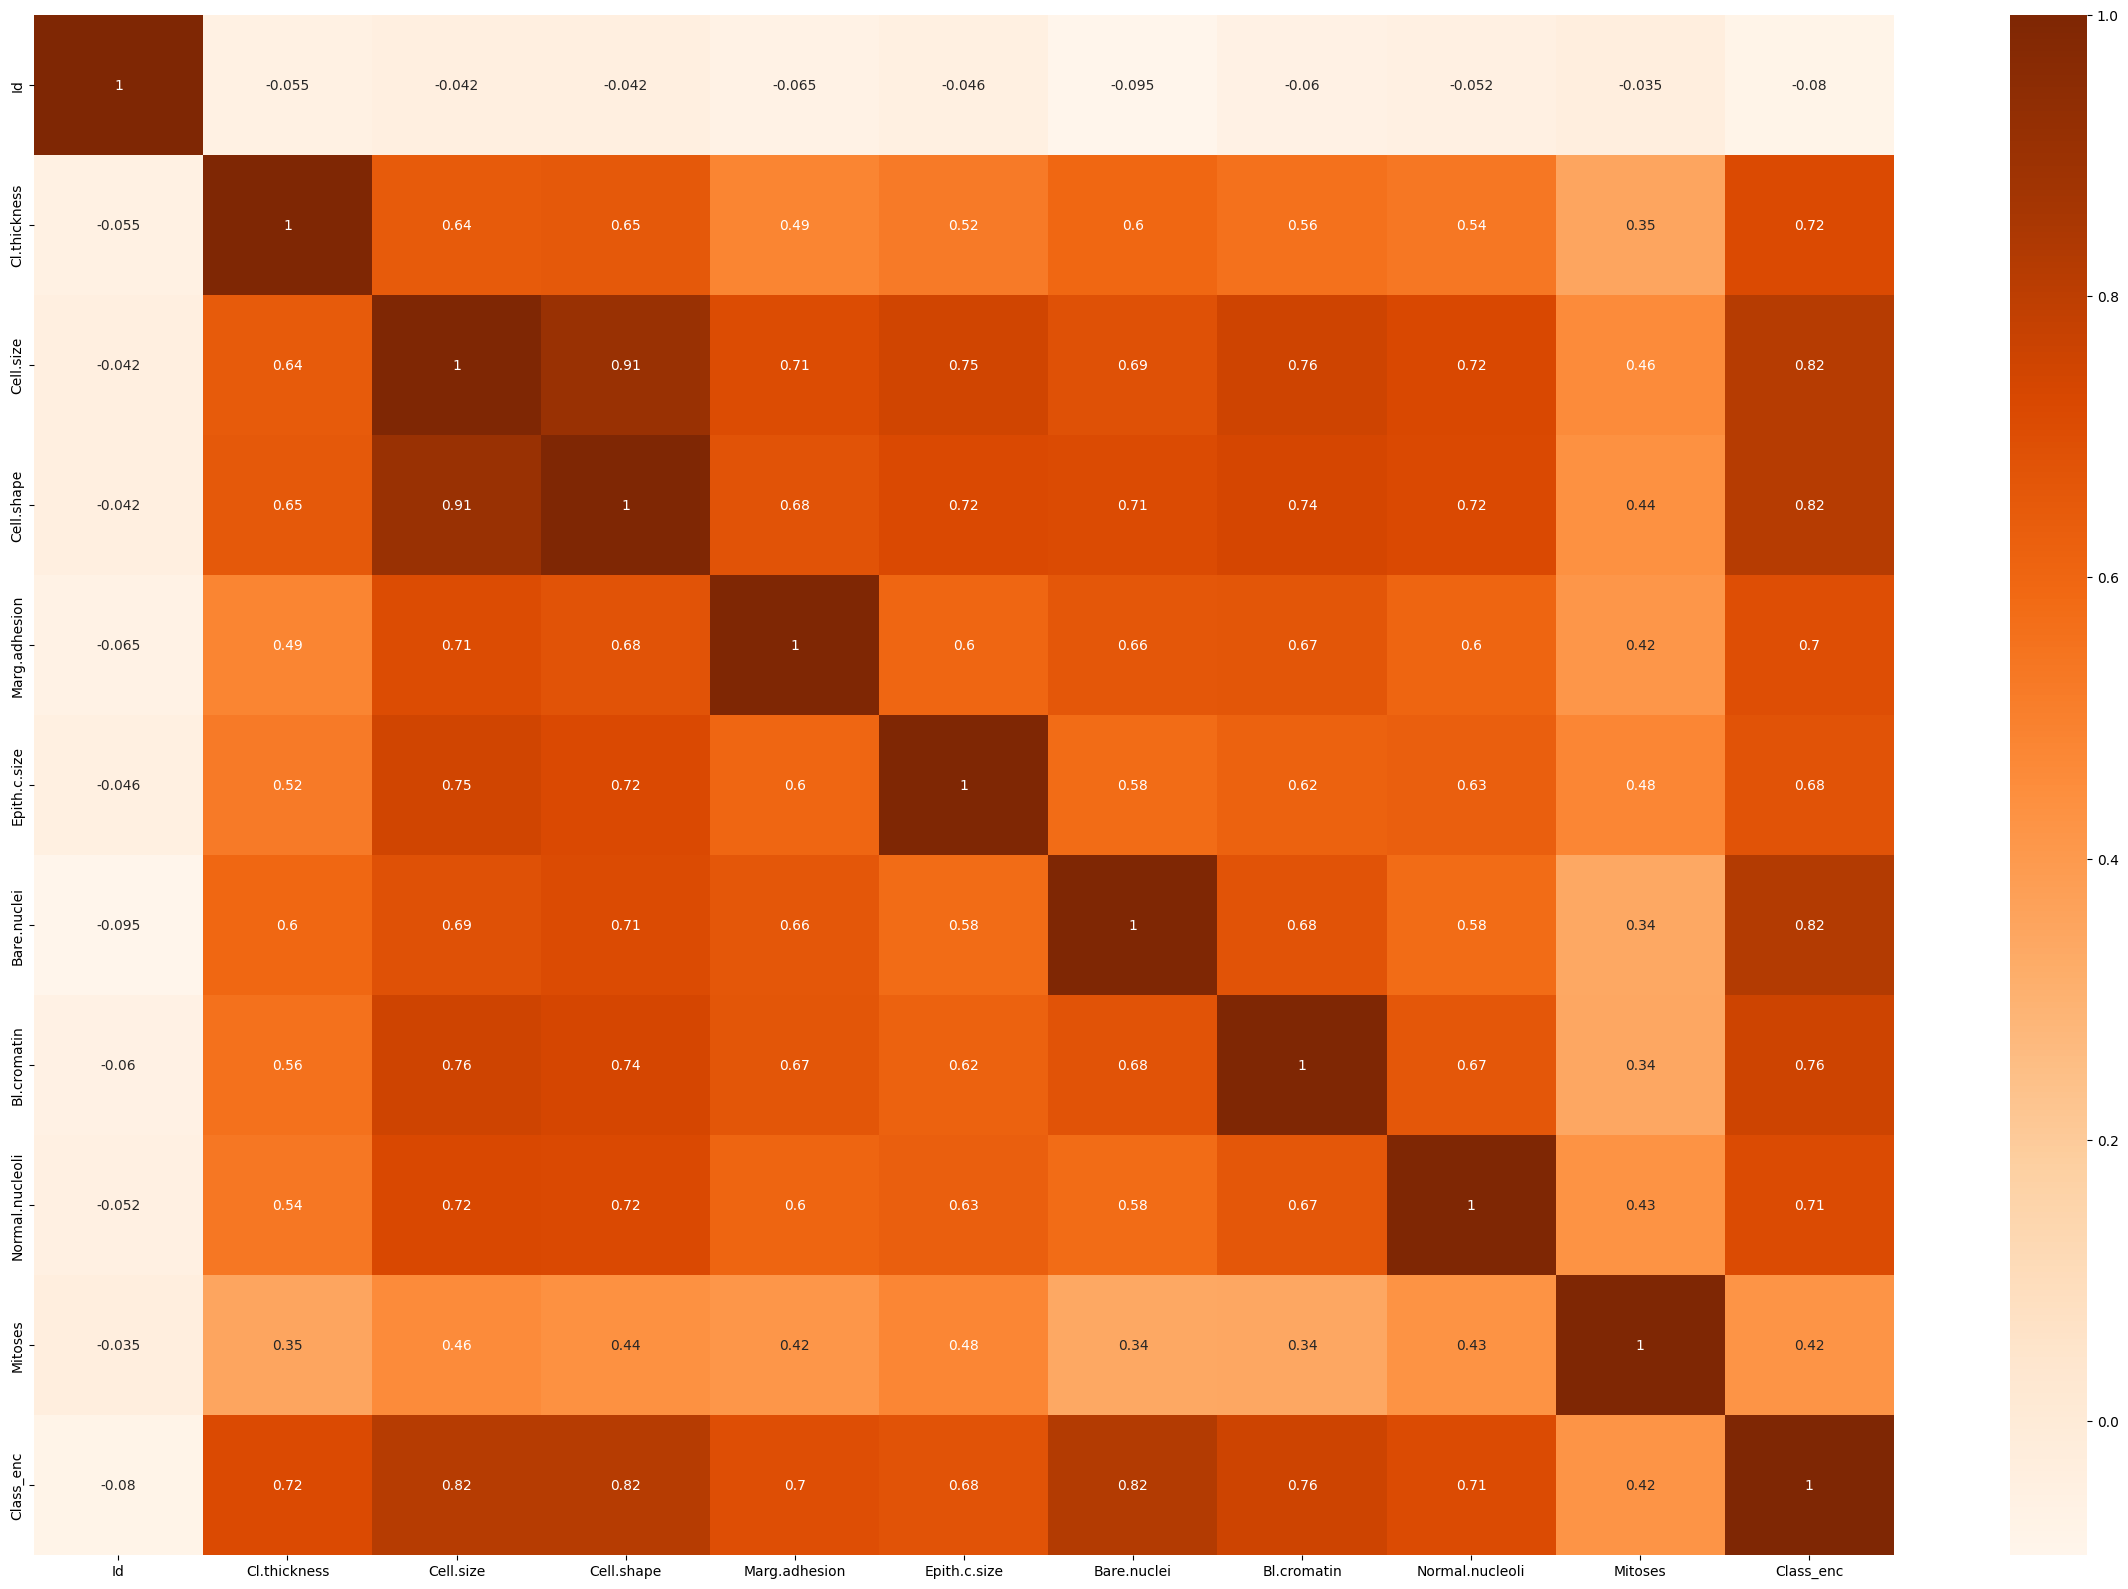

In [19]:
# Plotting a heatmap to visualize the correlation matrix of the data

x = data.corr()  # Compute the correlation matrix of the data
plt.figure(figsize=(30, 20))  # Set the figure size for the heatmap
sns.heatmap(x, annot=True, cmap='Oranges')


In [20]:
# Finding the correlation of all the columns with the encoded diagnosis column ('Class_enc')
correlations = data.corr()['Class_enc'].abs().sort_values()

# Print the absolute correlations in ascending order
print(correlations)


Id                 0.080226
Mitoses            0.423170
Epith.c.size       0.682785
Marg.adhesion      0.696800
Normal.nucleoli    0.712244
Cl.thickness       0.716001
Bl.cromatin        0.756616
Cell.size          0.817904
Cell.shape         0.818934
Bare.nuclei        0.824843
Class_enc          1.000000
Name: Class_enc, dtype: float64


In [21]:
# Extract column names with correlations less than 0.4 with the encoded diagnosis column ('Class_enc')
low_correlation_cols = correlations[correlations < 0.4].index.tolist()

# Convert the column names to a list
low_correlation_cols


['Id']

In [22]:
data1 = data.drop(low_correlation_cols, axis=1)  # Remove columns with low correlations from the data

# Apply PCA to reduce dimensionality
# pca = PCA(n_components=0.95)  # Retain 95% of variance
# X_pca = pca.fit_transform(X)

# Get the list of removed features
# removed_features = []
# for i in range(len(X.columns)):
#     if i >= X_pca.shape[1]:
#         removed_features.append(X.columns[i])
# print("Removed features:", removed_features)

In [23]:
data1

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class_enc
0,5,1,1,1,2,1.0,3,1,1,0
1,5,4,4,5,7,10.0,3,2,1,0
2,3,1,1,1,2,2.0,3,1,1,0
3,6,8,8,1,3,4.0,3,7,1,0
4,4,1,1,3,2,1.0,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
681,5,10,10,10,4,10.0,5,6,3,1
691,5,10,10,5,4,5.0,4,4,1,1
696,5,10,10,3,7,3.0,8,10,2,1
697,4,8,6,4,3,4.0,10,6,1,1


In [24]:
# Defining the independent variable (X) and dependent variable (y)
X = data1.drop(["Class_enc"], axis=1)  # Independent variable (features)
y = data1["Class_enc"]  # Dependent variable (target)

# Splitting the dataset into 70% training and 30% testing data using stratified sampling method
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)


In [25]:
from sklearn.naive_bayes import GaussianNB  # Import Gaussian Naive Bayes classifier


In [26]:
# Import accuracy_score function 
from sklearn.metrics import accuracy_score   

# Initialize the Naive Bayes model
naive_bayes = GaussianNB()

# Fit the training data to the Naive Bayes model
naive_bayes.fit(X_train, y_train)

# Make predictions on the test data
y_pred_nb = naive_bayes.predict(X_test)

# Evaluate the Naive Bayes model's performance
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Accuracy of the Naive Bayes Classifier: {accuracy_nb}')


Accuracy of the Naive Bayes Classifier: 0.9714285714285714


In [27]:
# Making a Confusion Matrix to check the False Positive and False Negetive 
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test, y_pred_nb)
cm_lr

array([[133,   5],
       [  1,  71]], dtype=int64)

In [28]:
# Bagging using RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.3f}")

Random Forest Accuracy: 0.981


In [29]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf

array([[135,   3],
       [  1,  71]], dtype=int64)

In [30]:
data1.columns  # Display the columns of the 'data1' DataFrame

Index(['Cl.thickness', 'Cell.size', 'Cell.shape', 'Marg.adhesion',
       'Epith.c.size', 'Bare.nuclei', 'Bl.cromatin', 'Normal.nucleoli',
       'Mitoses', 'Class_enc'],
      dtype='object')

In [31]:
# Create a DataFrame for custom input data
custom_input = pd.DataFrame({
    'Cl.thickness': [8],
    'Cell.size': [10],
    'Cell.shape': [10],
    'Marg.adhesion': [8],
    'Epith.c.size': [7],
    'Bare.nuclei': [10],  # This value can vary depending on the dataset, ensure it's appropriate
    'Bl.cromatin': [9],
    'Normal.nucleoli': [7],
    'Mitoses': [10]
})

# Make predictions using the trained Naive Bayes classifier
pred = naive_bayes.predict(custom_input)

# Print the predictions
print("Prediction:", pred)


Prediction: [1]
